In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 8.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/kep_lightcurves.csv')

In [ ]:
df.head()

,001430305_orig,001430305_rscl,001430305_diff,001430305_res,001724719_orig,001724719_rscl,001724719_diff,001724719_res,005209845_orig,005209845_rscl,005209845_diff,005209845_res,007596240_orig,007596240_rscl,007596240_diff,007596240_res,007609553_orig,007609553_rscl,007609553_diff,007609553_res,008241079_orig,008241079_rscl,008241079_diff,008241079_res,008247770_orig,008247770_rscl,008247770_diff,008247770_res,009345933_orig,009345933_rscl,009345933_diff,009345933_res,009347009_orig,009347009_rscl,009347009_diff,009347009_res,009349482_orig,009349482_rscl,009349482_diff,009349482_res,009349757_orig,009349757_rscl,009349757_diff,009349757_res,010024701_orig,010024701_rscl,010024701_diff,010024701_res,011611275_orig,011611275_rscl,011611275_diff,011611275_res
0,70076.937500,-4.943128,NaN,NaN,36908.703125,-9.949895,NaN,NaN,NaN,NaN,NaN,NaN,17216.855469,-1.352576,NaN,NaN,21305.250000,38.363869,NaN,NaN,58825.707031,-22.679649,NaN,NaN,28152.820312,4.405285,NaN,NaN,6622.845215,-9.755652,NaN,NaN,7623.384277,2.218721,NaN,NaN,9170.667969,-4.975001,NaN,NaN,12013.286133,NaN,NaN,NaN,64356.824219,-45.783910,NaN,NaN,13055.132812,-1.308401,NaN,NaN
1,70084.218750,2.338122,7.281250,5.946760,36898.964844,-19.688176,-9.738281,-7.502174,NaN,NaN,NaN,NaN,17216.673828,-1.534217,-0.181641,-0.139067,21286.583984,19.697854,-18.666016,-16.005300,58836.117188,-12.269493,10.410156,8.151699,28149.888672,1.473645,-2.931641,-2.382319,6622.788574,-9.812293,-0.056641,-0.045139,7617.471191,-3.694365,-5.913086,-4.749436,9164.140625,-11.502345,-6.527344,-5.017492,11960.816406,-16.642208,NaN,NaN,64348.078125,-54.530004,-8.746094,-7.580537,13051.712891,-4.728323,-3.419922,-2.610822
2,70083.304688,NaN,NaN,NaN,36912.355469,-6.297551,13.390625,7.572468,NaN,NaN,NaN,NaN,17208.710938,-9.497108,-7.962891,-7.126940,21285.962891,19.076760,-0.621094,-8.883810,58857.257812,NaN,NaN,NaN,28143.523438,-4.891590,-6.365234,-7.240823,6623.792480,-8.808387,1.003906,0.893082,7618.109863,-3.055694,0.638672,-2.056092,9167.931641,-7.711330,3.791016,0.461747,11956.935547,-20.523067,-3.880859,-3.034287,64367.148438,-35.459692,19.070312,14.729954,13051.305664,-5.135550,-0.407227,-1.883920
3,70080.953125,-0.927503,NaN,NaN,36908.417969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17214.728516,-3.479529,6.017578,0.587000,21294.064453,27.178322,8.101562,3.255237,58838.042969,-10.343712,NaN,NaN,28152.923828,4.508801,9.400391,4.402531,6625.279785,-7.321082,1.487305,2.032814,7617.322266,-3.843291,-0.787598,-2.099024,9166.625977,-9.016994,-1.305664,-0.877480,11961.858398,-15.600216,4.922852,2.696846,64359.851562,-42.756567,-7.296875,1.223752,13058.725586,2.284372,7.419922,5.625438
4,70084.718750,2.838122,3.765625,3.034498,36910.386719,-8.266301,NaN,NaN,NaN,NaN,NaN,NaN,17225.476562,NaN,NaN,NaN,21292.541016,25.654885,-1.523438,1.477043,58830.058594,-18.328087,-7.984375,-6.309480,28162.455078,14.040051,9.531250,12.680984,6628.417480,-4.183387,3.137695,4.531527,7620.126465,-1.039092,2.804199,1.283359,9166.856445,-8.786525,0.230469,-0.470799,11956.023438,-21.435176,-5.834961,-3.655363,64358.402344,-44.205785,-1.449219,-1.207732,13058.427734,1.986521,-0.297852,4.143945


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11315 entries, 0 to 11314
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   001430305_orig  10326 non-null  float64
 1   001430305_rscl  8889 non-null   float64
 2   001430305_diff  7829 non-null   float64
 3   001430305_res   7829 non-null   float64
 4   001724719_orig  10325 non-null  float64
 5   001724719_rscl  9386 non-null   float64
 6   001724719_diff  8651 non-null   float64
 7   001724719_res   8651 non-null   float64
 8   005209845_orig  497 non-null    float64
 9   005209845_rscl  467 non-null    float64
 10  005209845_diff  433 non-null    float64
 11  005209845_res   433 non-null    float64
 12  007596240_orig  10325 non-null  float64
 13  007596240_rscl  9447 non-null   float64
 14  007596240_diff  8764 non-null   float64
 15  007596240_res   8764 non-null   float64
 16  007609553_orig  10325 non-null  float64
 17  007609553_rscl  9078 non-null  

In [ ]:
for column in df.columns:
    print("{}: {}".format(column, df[column].isna().sum()))

001430305_orig: 989
001430305_rscl: 2426
001430305_diff: 3486
001430305_res: 3486
001724719_orig: 990
001724719_rscl: 1929
001724719_diff: 2664
001724719_res: 2664
005209845_orig: 10818
005209845_rscl: 10848
005209845_diff: 10882
005209845_res: 10882
007596240_orig: 990
007596240_rscl: 1868
007596240_diff: 2551
007596240_res: 2551
007609553_orig: 990
007609553_rscl: 2237
007609553_diff: 2994
007609553_res: 2994
008241079_orig: 990
008241079_rscl: 2278
008241079_diff: 3049
008241079_res: 3049
008247770_orig: 990
008247770_rscl: 2070
008247770_diff: 2819
008247770_res: 2819
009345933_orig: 990
009345933_rscl: 1611
009345933_diff: 2077
009345933_res: 2077
009347009_orig: 990
009347009_rscl: 1688
009347009_diff: 2227
009347009_res: 2227
009349482_orig: 990
009349482_rscl: 1669
009349482_diff: 2190
009349482_res: 2190
009349757_orig: 990
009349757_rscl: 1700
009349757_diff: 2245
009349757_res: 2245
010024701_orig: 990
010024701_rscl: 2006
010024701_diff: 2812
010024701_res: 2812
011611275_o

In [ ]:
df = df["001724719_rscl"]
df = df.dropna()
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

0    -9.949895
1   -19.688176
2    -6.297551
3    -8.266301
4    -6.360051
Name: 001724719_rscl, dtype: float64

In [ ]:
dict1 = {"Rescaled_flux":np.asarray(df)}
df = pd.DataFrame(dict1)

In [ ]:
df

,Rescaled_flux
0,-9.949895
1,-19.688176
2,-6.297551
3,-8.266301
4,-6.360051
...,...
9381,-10.521651
9382,1.400224
9383,10.224443
9384,-11.002120


In [ ]:
rescaled_flux_avgd = np.convolve(df["Rescaled_flux"], np.ones(10)/10, mode='valid')

# Autoregressive Model

In [ ]:
train, test = rescaled_flux_avgd[:int(0.8*len(df))], rescaled_flux_avgd[int(0.8*len(df)):]

In [ ]:
# Baseline RMSE
rmse_0 = np.sqrt(mean_squared_error(test, [np.mean(train) for i in range(len(test))]))
rmse_0

6.983517842775015

In [ ]:
# Parameters Grid
lags = np.linspace(10, 1000, 50)
lags = [int(lag) for lag in lags]
rmses = []

In [ ]:
# Grid Search on Parameters (Lags)
for lag in lags:
    print(lag)
    model = AutoReg(train, lags=lag)
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=True)
    rmses.append(np.sqrt(mean_squared_error(test, predictions)))

10
30
50
70
90
111
131
151
171
191
212
232
252
272
292
313
333
353
373
393
414
434
454
474
494
515
535
555
575
595
616
636
656
676
696
717
737
757
777
797
818
838
858
878
898
919
939
959
979
1000


(0.0, 1000.0)

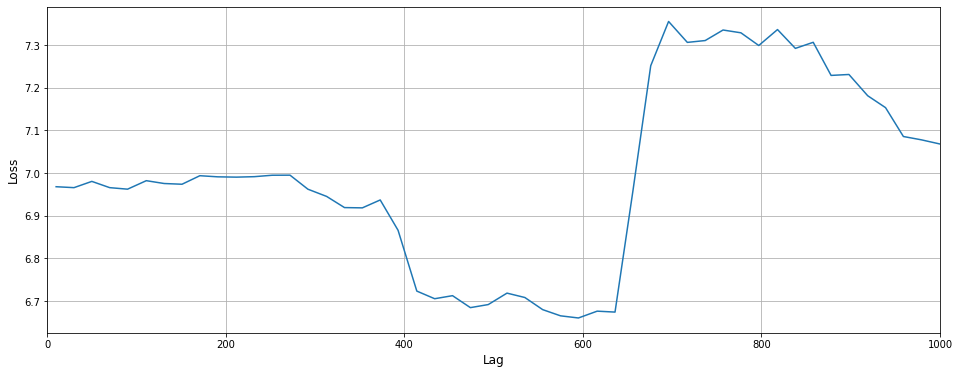

In [ ]:
plt.figure(figsize=(16,6))
plt.xlabel("Lag", size=12)
plt.ylabel("Loss", size=12)
plt.plot(lags, rmses)
plt.grid(True)
plt.xlim(0, 1000)

In [ ]:
i = np.argmin(rmses)
optimal = lags[i]

In [ ]:
model8 = AutoReg(train, lags=optimal)
model_fit8 = model8.fit()
predictions8 = model_fit8.predict(start=len(train), end=len(train)+len(test)-1)

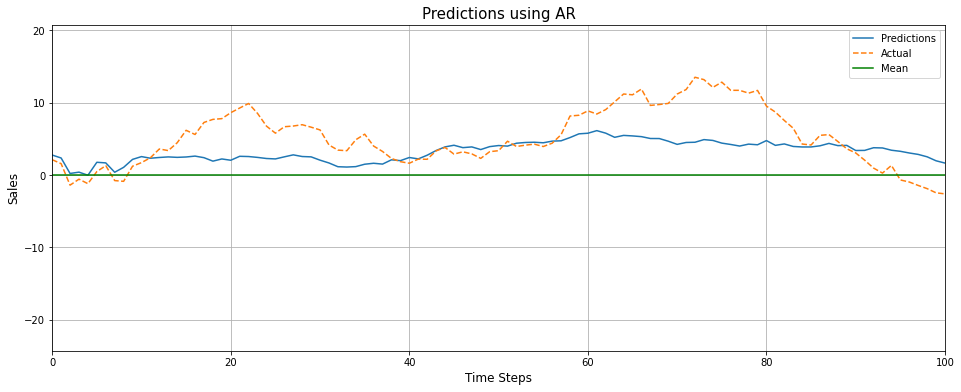

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Predictions using AR", size=15)
plt.plot([i for i in range(len(test))], predictions8, label="Predictions")
plt.plot([i for i in range(len(test))], test, linestyle="--", label="Actual")
plt.axhline(np.mean(train), label="Mean", color = "green")
plt.ylabel("Sales", size=12)
plt.xlabel("Time Steps", size=12)
plt.xlim(0, 100)
# plt.ylim(0, 4)
plt.legend()
plt.grid(True)

# ARIMA

In [ ]:
plot_acf(df["Sales"], lags=50)

In [ ]:
plot_pacf(df["Sales"], lags=50)

In [ ]:
train, test = df["Sales"].iloc[:int(0.8*len(df))], df["Sales"].iloc[int(0.8*len(df)):]

In [ ]:
rmse_0 = np.sqrt(mean_squared_error(test, [np.mean(train) for i in range(len(test))]))
rmse_0

In [ ]:
ps = [1,2,3,4,5]
ds = [0,1]
qs = [0,1,2]
parameters = []
for p in ps:
    for q in qs:
        for d in ds:
            parameters.append((p,d,q))
rmses = []
parameters

In [ ]:
for p,d,q in parameters:
    print(p, d, q)
    model = ARIMA(train, order=(p,d,q))
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
    rmses.append(np.sqrt(mean_squared_error(test, predictions)))

In [ ]:
plt.figure(figsize=(16,6))
plt.xlabel("Parameters", size=12)
plt.ylabel("Loss", size=12)
plt.scatter([i for i in range(len(rmses))], rmses)
temp = [str(i) for i in parameters]
# plt.xticks(temp, rotation = 90)
plt.grid(True)
# plt.xlim(0, 1000)

In [ ]:
i = np.argmin(rmses)
optimal = parameters[i]

In [ ]:
optimal

In [ ]:
model9 = ARIMA(train, order=optimal)
model_fit9 = model9.fit()
predictions9 = model_fit9.predict(start=len(train), end=len(train)+len(test)-1)

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Predictions using ARIMA", size=15)
plt.plot([i for i in range(len(test))], predictions9, label="Predictions")
plt.plot([i for i in range(len(test))], test, linestyle="--", label="Actual")
plt.axhline(np.mean(train), label="Mean", color = "green")
plt.ylabel("Sales", size=12)
plt.xlabel("Time Steps", size=12)
plt.xlim(0, 100)
plt.ylim(0, 4)
plt.legend()
plt.grid(True)

In [ ]:
plt.figure(figsize=(16, 6))
# plt.title("Predictions using AR", size=15)
plt.plot([i for i in range(len(test))], predictions8, label="AR")
plt.plot([i for i in range(len(test))], predictions9, label="ARIMA")
plt.plot([i for i in range(len(test))], test, linestyle="--", label="Actual")
# plt.axhline(np.mean(train), label="Mean", color = "green")
plt.ylabel("Sales", size=12)
plt.xlabel("Time Steps", size=12)
plt.xlim(0, 100)
plt.ylim(0, 4)
plt.legend()
plt.grid(True)

#SARIMAX

In [ ]:
ps = [1,2,5]
ds = [1]
qs = [2]
Ps = [1,2,5]
Ds = [1]
Qs = [2]
ss = [5,10]
parameters = []
for p in ps:
    for d in ds:
        for q in qs:
            for P in Ps:
                for D in Ds:
                    for Q in Qs:
                        for s in ss:
                            parameters.append(((p,d,q), (P,D,Q,s)))
rmses = []
parameters

In [ ]:
# for params, seasonal_params in parameters:
#     print(params, seasonal_params)
#     model = SARIMAX(train, order=params, seasonal_order=seasonal_params)
#     model_fit = model.fit()
#     predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
#     rmses.append(np.sqrt(mean_squared_error(test, predictions)))

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(rmses)

In [ ]:
i = np.argmin(rmses)
optimal = parameters[i]

In [ ]:
model = SARIMAX(train, order=optimal[0], seasonal_order=optimal[1])
model_fit = model.fit()
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(predictions, label="Predictions")
plt.plot(test, label="Actual")
plt.axhline(np.mean(train), label="Mean")
# plt.xlim(32000,32500)
# plt.ylim(0,3)
plt.legend()

# Simple LSTM Network for Regression

In [ ]:
from sklearn.preprocessing import MinMaxScaler
df2 = pd.DataFrame({"index": [i for i in range(len(rescaled_flux_avgd))], "rescaled_flux_avgd": rescaled_flux_avgd})
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(np.asarray(df2["rescaled_flux_avgd"]).reshape(-1, 1))

In [ ]:
num_historical_entries = 30
data_input, data_output = [], []
for i in range(len(data)-num_historical_entries-1):
  data_input.append(np.asarray(data[i:(i+num_historical_entries)]))
  data_output.append(data[i + num_historical_entries])

In [ ]:
x_train, y_train = np.asarray(data_input[:int(0.8*len(df))]), np.asarray(data_output[:int(0.8*len(df))])
x_test, y_test = np.asarray(data_input[int(0.8*len(df)):]), np.asarray(data_output[int(0.8*len(df)):])

In [ ]:
np.shape(x_train)

(7508, 30, 1)

In [ ]:
# Reshape according to the requirements of the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20) 

model1 = Sequential()
model1.add(LSTM(200,
               activation="sigmoid",
               input_shape=(x_train.shape[1], x_train.shape[2])))
model1.add(Dropout(0.2))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',
              optimizer= Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-06))
history1 = model1.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), verbose=2, callbacks=es, shuffle=False)

Epoch 1/100
118/118 - 2s - loss: 0.3666 - val_loss: 0.0222 - 2s/epoch - 19ms/step
Epoch 2/100
118/118 - 1s - loss: 0.0516 - val_loss: 0.0051 - 775ms/epoch - 7ms/step
Epoch 3/100
118/118 - 1s - loss: 0.0486 - val_loss: 0.0050 - 865ms/epoch - 7ms/step
Epoch 4/100
118/118 - 1s - loss: 0.0476 - val_loss: 0.0049 - 762ms/epoch - 6ms/step
Epoch 5/100
118/118 - 1s - loss: 0.0483 - val_loss: 0.0048 - 845ms/epoch - 7ms/step
Epoch 6/100
118/118 - 1s - loss: 0.0469 - val_loss: 0.0048 - 755ms/epoch - 6ms/step
Epoch 7/100
118/118 - 1s - loss: 0.0462 - val_loss: 0.0047 - 740ms/epoch - 6ms/step
Epoch 8/100
118/118 - 1s - loss: 0.0454 - val_loss: 0.0046 - 843ms/epoch - 7ms/step
Epoch 9/100
118/118 - 1s - loss: 0.0429 - val_loss: 0.0045 - 787ms/epoch - 7ms/step
Epoch 10/100
118/118 - 1s - loss: 0.0431 - val_loss: 0.0044 - 842ms/epoch - 7ms/step
Epoch 11/100
118/118 - 1s - loss: 0.0418 - val_loss: 0.0045 - 777ms/epoch - 7ms/step
Epoch 12/100
118/118 - 1s - loss: 0.0419 - val_loss: 0.0043 - 844ms/epoch - 

In [ ]:
test_predicted1 = model1.predict(x_test)

In [ ]:
mean_squared_error(y_test, test_predicted1)

0.0019423917471444614

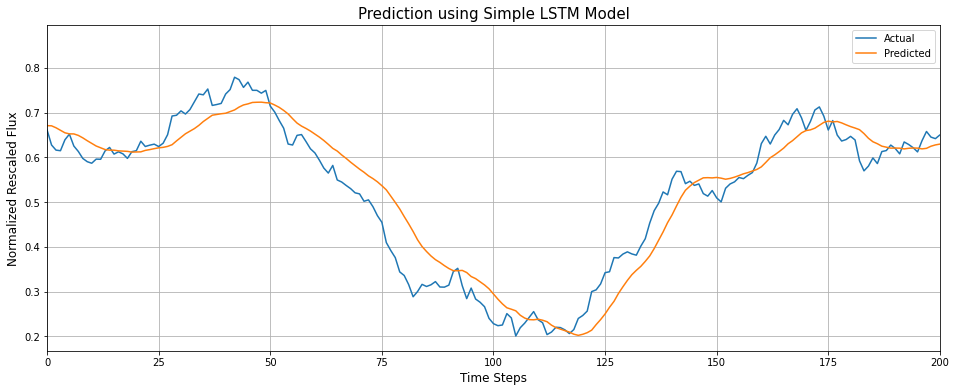

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Prediction using Simple LSTM Model", size=15)
plt.plot(y_test, label = "Actual")
plt.plot(test_predicted1, label = "Predicted")
plt.xlim(0, 200)
# plt.ylim(0, 0.6)
plt.xlabel("Time Steps", size=12)
plt.ylabel("Normalized Rescaled Flux", size=12)
plt.legend()
plt.grid(True)

In [ ]:
# Baseline RMSE
rmse_0 = np.sqrt(mean_squared_error(y_test, [np.mean(y_train) for i in range(len(y_test))]))
rmse_0

0.11327429849828932

# Stacked LSTM Network for Regression

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10) 

model2 = Sequential()
model2.add(LSTM(200,
               return_sequences=True,
               activation="sigmoid",
               input_shape=(x_train.shape[1], x_train.shape[2])))
model2.add(LSTM(200,
               activation="sigmoid"))
model2.add(Dropout(0.2))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error',
              optimizer= Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-06))
history2 = model2.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), verbose=2, callbacks=es, shuffle=False)

Epoch 1/100
118/118 - 4s - loss: 0.1229 - val_loss: 0.0120 - 4s/epoch - 35ms/step
Epoch 2/100
118/118 - 1s - loss: 0.0551 - val_loss: 0.0118 - 1s/epoch - 12ms/step
Epoch 3/100
118/118 - 1s - loss: 0.0541 - val_loss: 0.0113 - 1s/epoch - 12ms/step
Epoch 4/100
118/118 - 1s - loss: 0.0520 - val_loss: 0.0109 - 1s/epoch - 12ms/step
Epoch 5/100
118/118 - 1s - loss: 0.0476 - val_loss: 0.0107 - 1s/epoch - 12ms/step
Epoch 6/100
118/118 - 2s - loss: 0.0461 - val_loss: 0.0101 - 2s/epoch - 13ms/step
Epoch 7/100
118/118 - 2s - loss: 0.0423 - val_loss: 0.0097 - 2s/epoch - 13ms/step
Epoch 8/100
118/118 - 1s - loss: 0.0398 - val_loss: 0.0098 - 1s/epoch - 13ms/step
Epoch 9/100
118/118 - 1s - loss: 0.0380 - val_loss: 0.0090 - 1s/epoch - 11ms/step
Epoch 10/100
118/118 - 1s - loss: 0.0357 - val_loss: 0.0090 - 1s/epoch - 12ms/step
Epoch 11/100
118/118 - 1s - loss: 0.0333 - val_loss: 0.0086 - 1s/epoch - 12ms/step
Epoch 12/100
118/118 - 2s - loss: 0.0314 - val_loss: 0.0079 - 2s/epoch - 13ms/step
Epoch 13/100


In [ ]:
test_predicted2 = model2.predict(x_test)
test_predicted2 = np.squeeze(test_predicted2)
mean_squared_error(y_test, test_predicted2)

0.0017751252469717337

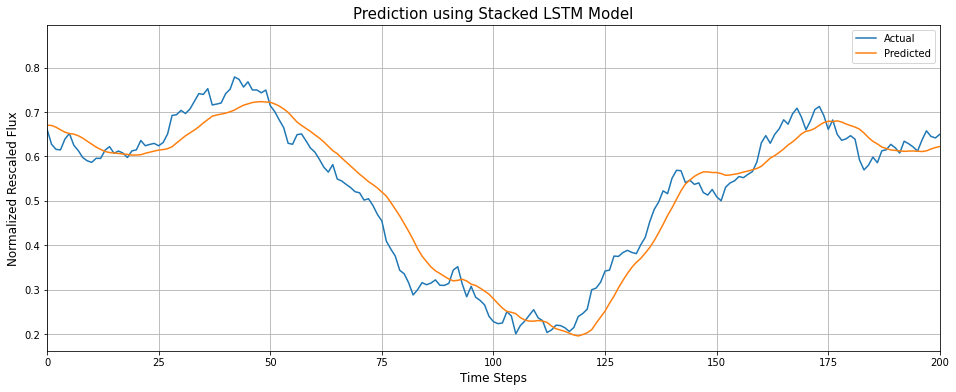

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Prediction using Stacked LSTM Model", size=15)
plt.plot(y_test, label="Actual")
plt.plot(test_predicted2, label="Predicted")
plt.xlim(0, 200)
# plt.ylim(0, 0.6)
plt.xlabel("Time Steps", size=12)
plt.ylabel("Normalized Rescaled Flux", size=12)
plt.legend()
plt.grid(True)

# Bidirectional LSTM Network for Regression

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10) 

model3 = Sequential()
model3.add(Bidirectional(LSTM(200,
               activation="sigmoid",
               input_shape=(x_train.shape[1], x_train.shape[2]))))
model3.add(Dropout(0.2))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error',
              optimizer= Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-06))
history3 = model3.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), verbose=2, callbacks=es, shuffle=False)

Epoch 1/100
118/118 - 4s - loss: 0.0529 - val_loss: 0.0083 - 4s/epoch - 34ms/step
Epoch 2/100
118/118 - 1s - loss: 0.0472 - val_loss: 0.0068 - 1s/epoch - 10ms/step
Epoch 3/100
118/118 - 1s - loss: 0.0439 - val_loss: 0.0059 - 1s/epoch - 11ms/step
Epoch 4/100
118/118 - 1s - loss: 0.0408 - val_loss: 0.0049 - 1s/epoch - 10ms/step
Epoch 5/100
118/118 - 1s - loss: 0.0387 - val_loss: 0.0045 - 1s/epoch - 10ms/step
Epoch 6/100
118/118 - 1s - loss: 0.0370 - val_loss: 0.0039 - 1s/epoch - 10ms/step
Epoch 7/100
118/118 - 1s - loss: 0.0342 - val_loss: 0.0037 - 1s/epoch - 10ms/step
Epoch 8/100
118/118 - 1s - loss: 0.0338 - val_loss: 0.0035 - 1s/epoch - 10ms/step
Epoch 9/100
118/118 - 1s - loss: 0.0320 - val_loss: 0.0034 - 1s/epoch - 10ms/step
Epoch 10/100
118/118 - 1s - loss: 0.0312 - val_loss: 0.0032 - 1s/epoch - 11ms/step
Epoch 11/100
118/118 - 1s - loss: 0.0283 - val_loss: 0.0031 - 1s/epoch - 11ms/step
Epoch 12/100
118/118 - 1s - loss: 0.0274 - val_loss: 0.0033 - 1s/epoch - 10ms/step
Epoch 13/100


In [ ]:
test_predicted3 = model3.predict(x_test)
test_predicted3 = np.squeeze(test_predicted3)
mean_squared_error(y_test, test_predicted3)

0.001477398964081913

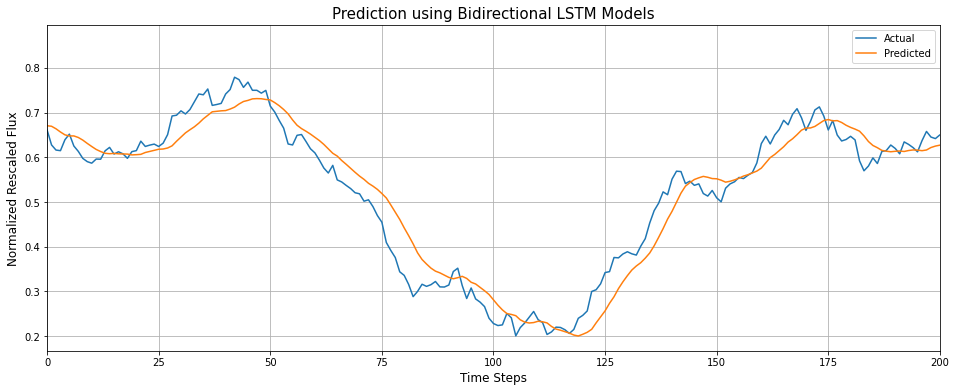

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Prediction using Bidirectional LSTM Models", size=15)
plt.plot(y_test, label="Actual")
plt.plot(test_predicted3, label="Predicted")
plt.xlim(0, 200)
# plt.ylim(0, 0.6)
plt.xlabel("Time Steps", size=12)
plt.ylabel("Normalized Rescaled Flux", size=12)
plt.legend()
plt.grid(True)

# Simple Gated Recurrent Units

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, GRU
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10) 

model4 = Sequential()
model4.add(GRU(200,
               activation="sigmoid",
               input_shape=(x_train.shape[1], x_train.shape[2])))
model4.add(Dropout(0.2))
model4.add(Dense(1))
model4.compile(loss='mean_squared_error',
              optimizer= Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-06))
history4 = model4.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), verbose=2, callbacks=es, shuffle=False)

Epoch 1/100
118/118 - 3s - loss: 0.0928 - val_loss: 0.0046 - 3s/epoch - 21ms/step
Epoch 2/100
118/118 - 1s - loss: 0.0405 - val_loss: 0.0045 - 782ms/epoch - 7ms/step
Epoch 3/100
118/118 - 1s - loss: 0.0403 - val_loss: 0.0043 - 741ms/epoch - 6ms/step
Epoch 4/100
118/118 - 1s - loss: 0.0381 - val_loss: 0.0041 - 719ms/epoch - 6ms/step
Epoch 5/100
118/118 - 1s - loss: 0.0373 - val_loss: 0.0039 - 647ms/epoch - 5ms/step
Epoch 6/100
118/118 - 1s - loss: 0.0356 - val_loss: 0.0038 - 645ms/epoch - 5ms/step
Epoch 7/100
118/118 - 1s - loss: 0.0333 - val_loss: 0.0037 - 629ms/epoch - 5ms/step
Epoch 8/100
118/118 - 1s - loss: 0.0320 - val_loss: 0.0036 - 640ms/epoch - 5ms/step
Epoch 9/100
118/118 - 1s - loss: 0.0310 - val_loss: 0.0033 - 763ms/epoch - 6ms/step
Epoch 10/100
118/118 - 1s - loss: 0.0292 - val_loss: 0.0032 - 822ms/epoch - 7ms/step
Epoch 11/100
118/118 - 1s - loss: 0.0283 - val_loss: 0.0031 - 811ms/epoch - 7ms/step
Epoch 12/100
118/118 - 1s - loss: 0.0265 - val_loss: 0.0030 - 780ms/epoch - 

In [ ]:
test_predicted4 = model4.predict(x_test)
test_predicted4 = np.squeeze(test_predicted4)
mean_squared_error(y_test, test_predicted4)

0.00143525238258023

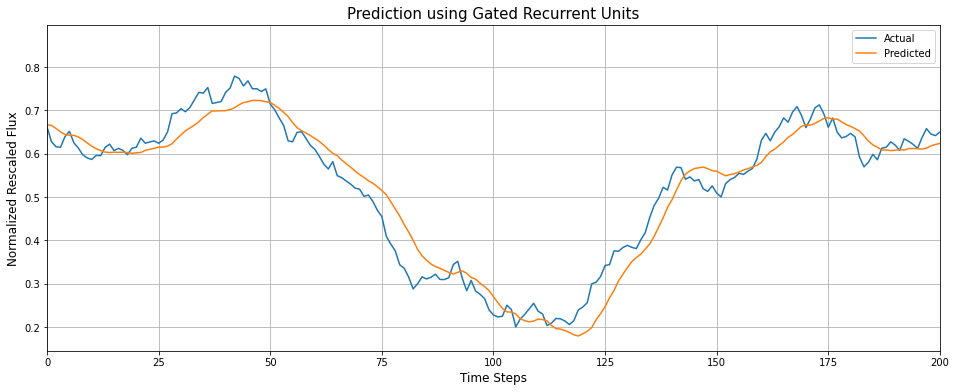

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Prediction using Gated Recurrent Units", size=15)
plt.plot(y_test, label="Actual")
plt.plot(test_predicted4, label="Predicted")
plt.xlim(0, 200)
# plt.ylim(0, 0.6)
plt.xlabel("Time Steps", size=12)
plt.ylabel("Normalized Rescaled Flux", size=12)
plt.legend()
plt.grid(True)

# Stacked Gated Recurrent Unit

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, GRU
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10) 

model5 = Sequential()
model5.add(GRU(200,
               return_sequences=True,
               activation="sigmoid",
               input_shape=(x_train.shape[1], x_train.shape[2])))
model5.add(GRU(200,
               activation="sigmoid",
               input_shape=(x_train.shape[1], x_train.shape[2])))
model5.add(Dropout(0.2))
model5.add(Dense(1))
model5.compile(loss='mean_squared_error',
              optimizer= Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-06))
history5 = model5.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), verbose=2, callbacks=es, shuffle=False)

Epoch 1/100
118/118 - 4s - loss: 0.0698 - val_loss: 0.0128 - 4s/epoch - 36ms/step
Epoch 2/100
118/118 - 1s - loss: 0.0518 - val_loss: 0.0118 - 1s/epoch - 11ms/step
Epoch 3/100
118/118 - 1s - loss: 0.0458 - val_loss: 0.0109 - 1s/epoch - 11ms/step
Epoch 4/100
118/118 - 1s - loss: 0.0435 - val_loss: 0.0100 - 1s/epoch - 11ms/step
Epoch 5/100
118/118 - 1s - loss: 0.0395 - val_loss: 0.0095 - 1s/epoch - 11ms/step
Epoch 6/100
118/118 - 1s - loss: 0.0367 - val_loss: 0.0085 - 1s/epoch - 11ms/step
Epoch 7/100
118/118 - 1s - loss: 0.0328 - val_loss: 0.0079 - 1s/epoch - 11ms/step
Epoch 8/100
118/118 - 1s - loss: 0.0299 - val_loss: 0.0069 - 1s/epoch - 11ms/step
Epoch 9/100
118/118 - 1s - loss: 0.0269 - val_loss: 0.0064 - 1s/epoch - 11ms/step
Epoch 10/100
118/118 - 1s - loss: 0.0242 - val_loss: 0.0059 - 1s/epoch - 11ms/step
Epoch 11/100
118/118 - 1s - loss: 0.0213 - val_loss: 0.0053 - 1s/epoch - 11ms/step
Epoch 12/100
118/118 - 1s - loss: 0.0202 - val_loss: 0.0051 - 1s/epoch - 11ms/step
Epoch 13/100


In [ ]:
test_predicted5 = model5.predict(x_test)
test_predicted5 = np.squeeze(test_predicted5)
mean_squared_error(y_test, test_predicted5)

0.0011038556048459847

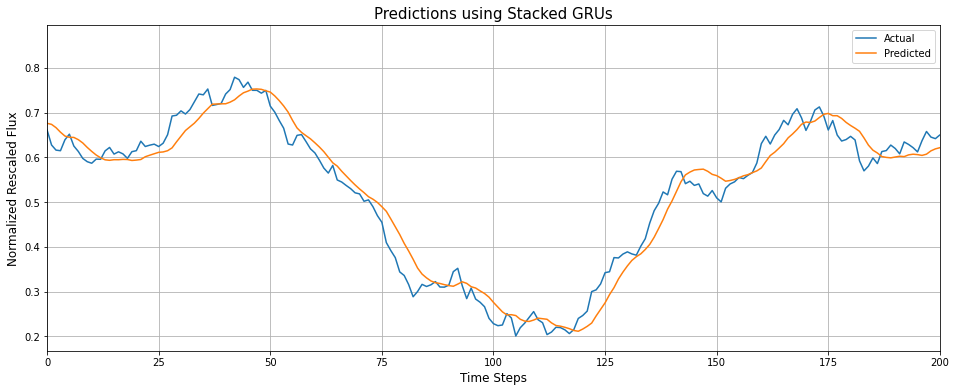

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Predictions using Stacked GRUs", size=15)
plt.plot(y_test, label="Actual")
plt.plot(test_predicted5, label="Predicted")
plt.xlim(0, 200)
# plt.ylim(0, 0.6)
plt.xlabel("Time Steps", size=12)
plt.ylabel("Normalized Rescaled Flux", size=12)
plt.legend()
plt.grid(True)

# Bidirectional Gated Recurrent Unit

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10) 

model6 = Sequential()
model6.add(Bidirectional(GRU(200,
               activation="sigmoid",
               input_shape=(x_train.shape[1], x_train.shape[2]))))
model6.add(Dropout(0.2))
model6.add(Dense(1))
model6.compile(loss='mean_squared_error',
              optimizer= Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-06))
history6 = model6.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), verbose=2, callbacks=es, shuffle=False)

Epoch 1/100
118/118 - 5s - loss: 0.0619 - val_loss: 0.0066 - 5s/epoch - 40ms/step
Epoch 2/100
118/118 - 2s - loss: 0.0378 - val_loss: 0.0060 - 2s/epoch - 14ms/step
Epoch 3/100
118/118 - 2s - loss: 0.0366 - val_loss: 0.0052 - 2s/epoch - 14ms/step
Epoch 4/100
118/118 - 2s - loss: 0.0347 - val_loss: 0.0049 - 2s/epoch - 14ms/step
Epoch 5/100
118/118 - 2s - loss: 0.0331 - val_loss: 0.0042 - 2s/epoch - 14ms/step
Epoch 6/100
118/118 - 2s - loss: 0.0321 - val_loss: 0.0038 - 2s/epoch - 13ms/step
Epoch 7/100
118/118 - 1s - loss: 0.0288 - val_loss: 0.0035 - 1s/epoch - 13ms/step
Epoch 8/100
118/118 - 2s - loss: 0.0284 - val_loss: 0.0036 - 2s/epoch - 14ms/step
Epoch 9/100
118/118 - 2s - loss: 0.0273 - val_loss: 0.0031 - 2s/epoch - 15ms/step
Epoch 10/100
118/118 - 2s - loss: 0.0254 - val_loss: 0.0030 - 2s/epoch - 14ms/step
Epoch 11/100
118/118 - 2s - loss: 0.0246 - val_loss: 0.0030 - 2s/epoch - 14ms/step
Epoch 12/100
118/118 - 2s - loss: 0.0233 - val_loss: 0.0027 - 2s/epoch - 14ms/step
Epoch 13/100


In [ ]:
test_predicted6 = model6.predict(x_test)
test_predicted6 = np.squeeze(test_predicted6)
mean_squared_error(y_test, test_predicted6)

0.0014611311670741738

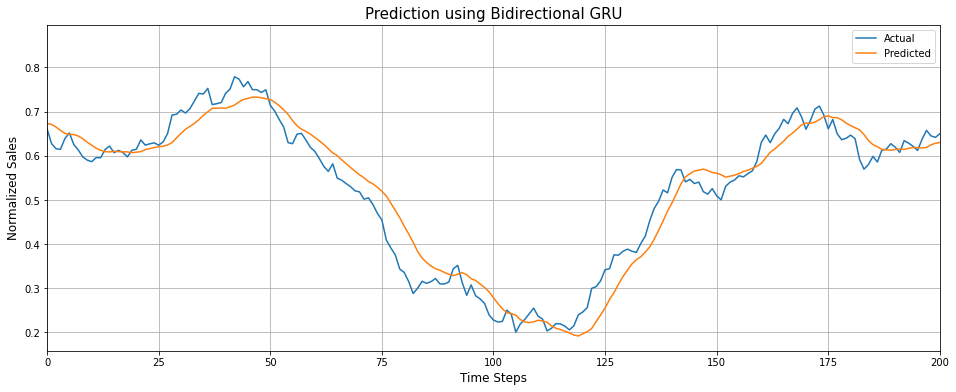

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Prediction using Bidirectional GRU", size=15)
plt.plot(y_test, label = "Actual")
plt.plot(test_predicted6, label = "Predicted")
plt.xlim(0, 200)
# plt.ylim(0, 0.6)
plt.xlabel("Time Steps", size=12)
plt.ylabel("Normalized Sales", size=12)
plt.legend()
plt.grid(True)

# CNN-LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
df2 = pd.DataFrame({"index": [i for i in range(len(rescaled_flux_avgd))], "rescaled_flux_avgd": rescaled_flux_avgd})
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(np.asarray(df2["rescaled_flux_avgd"]).reshape(-1, 1))
num_historical_entries = 30
data_input, data_output = [], []
for i in range(len(data)-num_historical_entries-1):
  data_input.append(np.asarray(data[i:(i+num_historical_entries)]))
  data_output.append(data[i + num_historical_entries])

x_train, y_train = np.asarray(data_input[:int(0.8*len(df))]), np.asarray(data_output[:int(0.8*len(df))])
x_test, y_test = np.asarray(data_input[int(0.8*len(df)):]), np.asarray(data_output[int(0.8*len(df)):])

x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [ ]:
from keras.models import Sequential
from keras.layers import TimeDistributed, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, TimeDistributed
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10) 

model7 = Sequential()
model7.add(Conv1D(128, 1, input_shape=(x_train.shape[1], x_train.shape[2])))
model7.add(Dropout(0.2))
model7.add(LSTM(200,
               activation="sigmoid"))
model7.add(Dropout(0.2))
model7.add(Dense(1))
model7.compile(loss='mean_squared_error',
              optimizer= Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-06))
history7 = model7.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), verbose=2, callbacks=es, shuffle=False)

Epoch 1/100
118/118 - 3s - loss: 0.5749 - val_loss: 0.0118 - 3s/epoch - 29ms/step
Epoch 2/100
118/118 - 2s - loss: 0.0580 - val_loss: 0.0109 - 2s/epoch - 15ms/step
Epoch 3/100
118/118 - 2s - loss: 0.0579 - val_loss: 0.0096 - 2s/epoch - 15ms/step
Epoch 4/100
118/118 - 2s - loss: 0.0527 - val_loss: 0.0085 - 2s/epoch - 15ms/step
Epoch 5/100
118/118 - 2s - loss: 0.0508 - val_loss: 0.0074 - 2s/epoch - 14ms/step
Epoch 6/100
118/118 - 1s - loss: 0.0487 - val_loss: 0.0064 - 1s/epoch - 12ms/step
Epoch 7/100
118/118 - 2s - loss: 0.0456 - val_loss: 0.0056 - 2s/epoch - 13ms/step
Epoch 8/100
118/118 - 2s - loss: 0.0413 - val_loss: 0.0046 - 2s/epoch - 14ms/step
Epoch 9/100
118/118 - 1s - loss: 0.0391 - val_loss: 0.0040 - 1s/epoch - 11ms/step
Epoch 10/100
118/118 - 2s - loss: 0.0355 - val_loss: 0.0034 - 2s/epoch - 13ms/step
Epoch 11/100
118/118 - 2s - loss: 0.0340 - val_loss: 0.0030 - 2s/epoch - 14ms/step
Epoch 12/100
118/118 - 1s - loss: 0.0321 - val_loss: 0.0028 - 1s/epoch - 12ms/step
Epoch 13/100


In [ ]:
test_predicted7 = model7.predict(x_test)
test_predicted7 = np.squeeze(test_predicted7)
mean_squared_error(y_test, test_predicted7)

0.002619556596149307

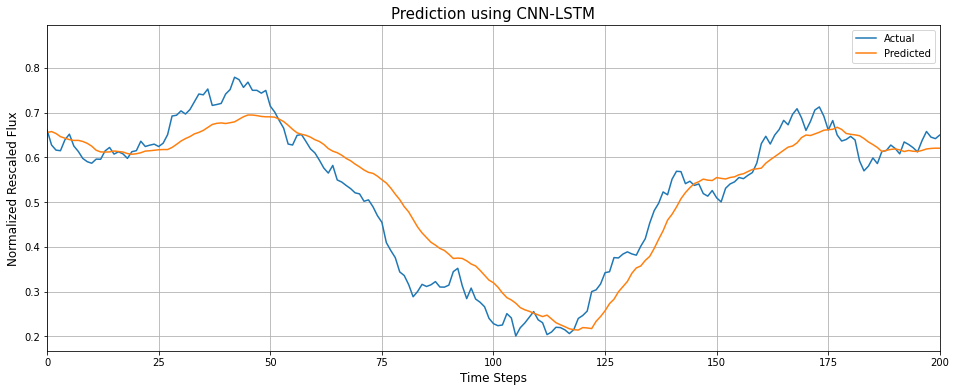

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Prediction using CNN-LSTM", size=15)
plt.plot(y_test, label = "Actual")
plt.plot(test_predicted7, label="Predicted")
plt.xlim(0, 200)
# plt.ylim(0, 0.6)
plt.xlabel("Time Steps", size=12)
plt.ylabel("Normalized Rescaled Flux", size=12)
plt.legend()
plt.grid(True)

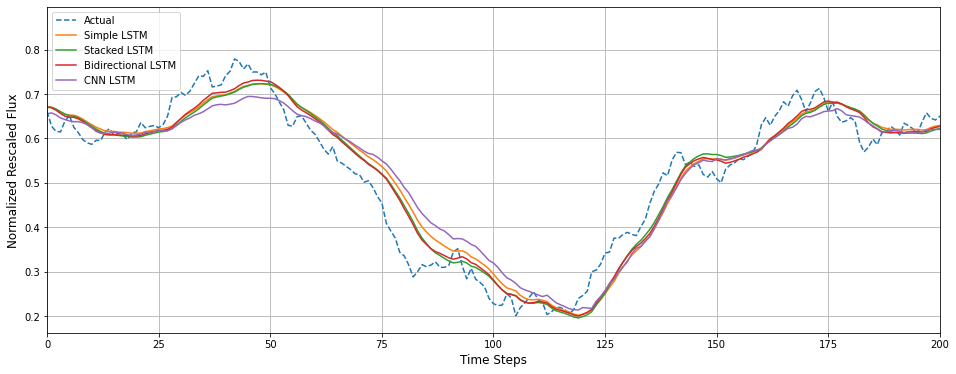

In [ ]:
plt.figure(figsize=(16, 6))
# plt.title("Prediction using LSTM", size=15)
plt.plot(y_test, linestyle = "--", label = "Actual")
plt.plot(test_predicted1, label="Simple LSTM")
plt.plot(test_predicted2, label="Stacked LSTM")
plt.plot(test_predicted3, label="Bidirectional LSTM")
plt.plot(test_predicted7, label="CNN LSTM")
plt.xlim(0, 200)
# plt.ylim(0, 0.6)
plt.xlabel("Time Steps", size=12)
plt.ylabel("Normalized Rescaled Flux", size=12)
plt.legend()
plt.grid(True)

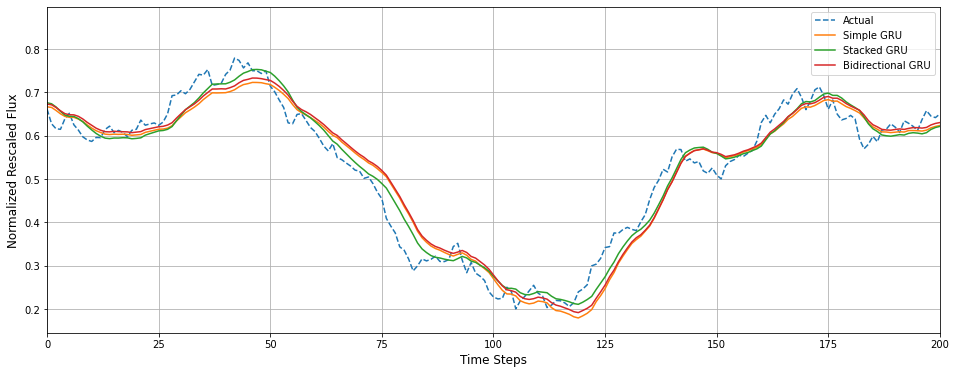

In [ ]:
plt.figure(figsize=(16, 6))
# plt.title("Prediction using GRU", size=15)
plt.plot(y_test, linestyle = "--", label = "Actual")
plt.plot(test_predicted4, label="Simple GRU")
plt.plot(test_predicted5, label="Stacked GRU")
plt.plot(test_predicted6, label="Bidirectional GRU")
plt.xlim(0, 200)
# plt.ylim(0, 0.6)
plt.xlabel("Time Steps", size=12)
plt.ylabel("Normalized Rescaled Flux", size=12)
plt.legend()
plt.grid(True)

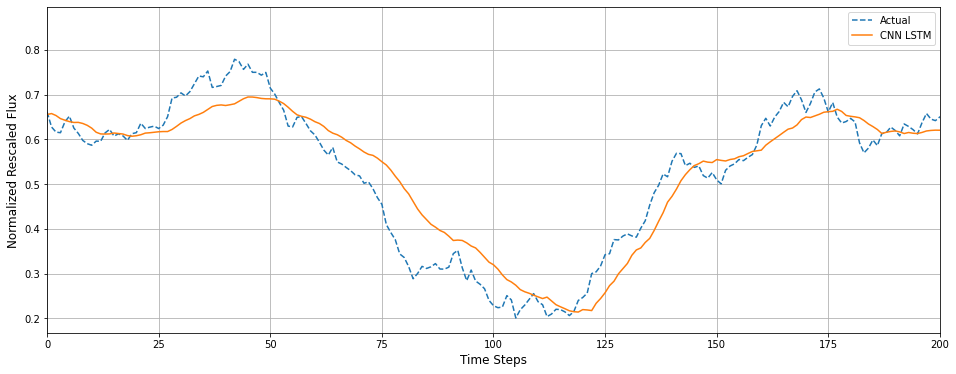

In [ ]:
plt.figure(figsize=(16, 6))
# plt.title("Prediction using LSTM", size=15)
plt.plot(y_test, linestyle = "--", label = "Actual")
# plt.plot(test_predicted1, label="Simple LSTM")
# plt.plot(test_predicted2, label="Stacked LSTM")
# plt.plot(test_predicted3, label="Bidirectional LSTM")
plt.plot(test_predicted7, label="CNN LSTM")
plt.xlim(0, 200)
# plt.ylim(0, 0.6)
plt.xlabel("Time Steps", size=12)
plt.ylabel("Normalized Rescaled Flux", size=12)
plt.legend()
plt.grid(True)